In [152]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import dill as pickle
from pyseir.load_data import *
from pyseir.utils import REF_DATE
from datetime import timedelta
from pyseir.testing.test_strategy_simulator import TestStrategySimulator
from pyseir.testing.plots import plot_results
from pyseir.inference.fit_results import load_Rt_result
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Get demographic mapper result

Assuming demographic mapper result and Rt inference are ready...

Assuming following data for a worksite (lots of wild assumptions ...)
- population size at worksite: 1000
- PCR COST per individual = 250
- PCR sensitivity (P(positive PCR | infected)) = 0.7
- ANTIBODY COST = 120
- ANTIBODY SENSITIVITY (P(positive Antibody | immune)) = 0.5
- max pcr availability per month = 300
- max antibody test availability (distributed before worksite re-open) = 1000
- mininum number of cases for outbreak = 3
- cost of hospitalization due to covid = 3000 
- frac_contact_active (fraction of worker back to worksite at first) = 0.5 
- cost of worksite closure = 200000

In [174]:
ts = TestStrategySimulator(fips='06')
results = ts.run()

0.1604541244816768


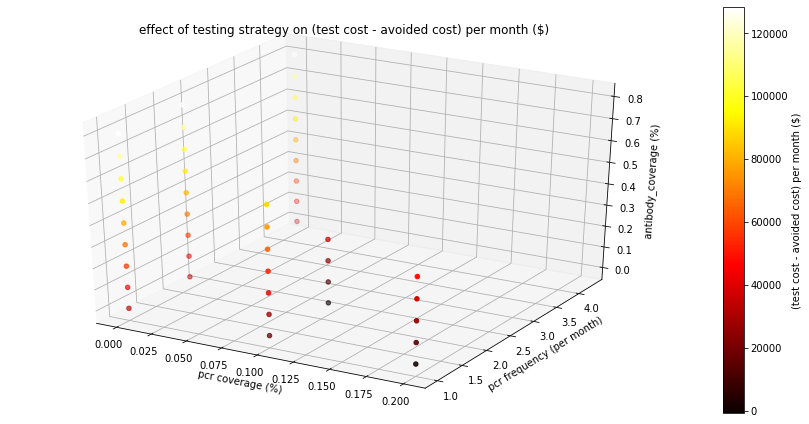

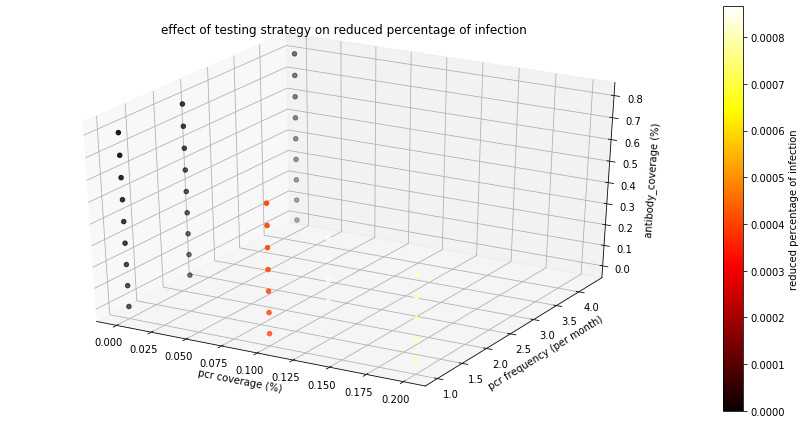

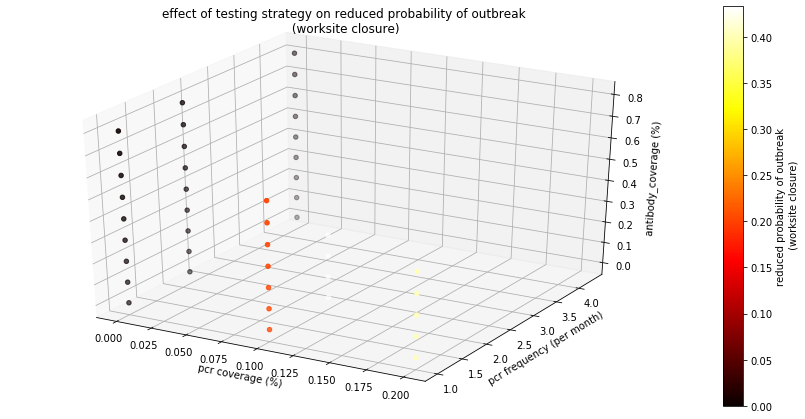

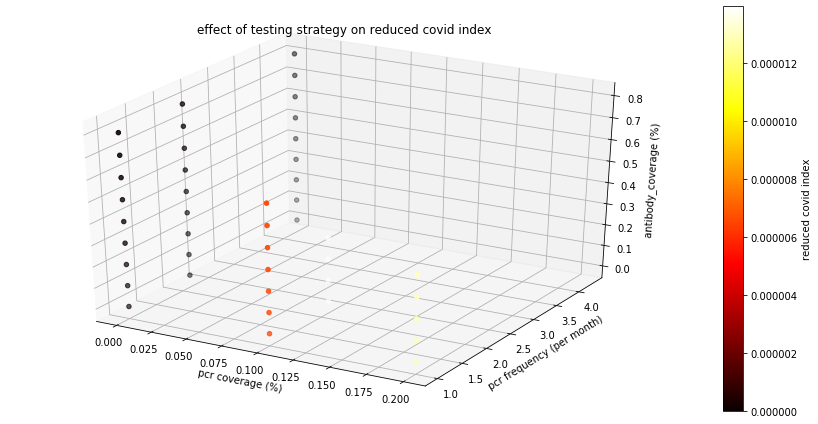

In [175]:
plot_results(results)

In [178]:
ts.optimize(by='net_cost')

{'antibody_coverage': 0.0,
 'pcr_coverage': 0.1,
 'pcr_frequency': 0.07142857142857142,
 'delta_p_infected': 0.0008660606895750092,
 'delta_immunity': 0.0,
 'delta_covid_index': 1.3947625576743277e-05,
 'prevented_secondary_transmission': 0.4330303447875046,
 'test_cost_pcr': 25000.0,
 'test_cost_ab': 0.0,
 'test_cost': 53571.428571428565,
 'delta_outbreak_prob': 0.4330303447875046,
 'avoided_cost': 86668.83327259627,
 'hospitalization_cost_no_test': 278.95251153486555,
 'worksite_outbreak_cost_no_test': 32090.82489633536,
 'cost_no_test': 32369.777407870228,
 'net_cost': -727.627293297468}